In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Data points
data = np.array([
    [2,10],
    [2,5],
    [8,4],
    [5,8],
    [7,5],
    [6,4],
    [1,2],
    [4,9]
])
print(data)

[[ 2 10]
 [ 2  5]
 [ 8  4]
 [ 5  8]
 [ 7  5]
 [ 6  4]
 [ 1  2]
 [ 4  9]]


In [13]:
# Calculate Within-Cluster Sum of Squares (WCSS) for k from 1 to 4
# k sholud not exceed 8, but as a rule of thumb typically we go up to
# sqrt(n) or n/2

wcss = []
k_range = range(1,5)
for k in k_range:
    kmeans = KMeans(n_clusters = k, init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


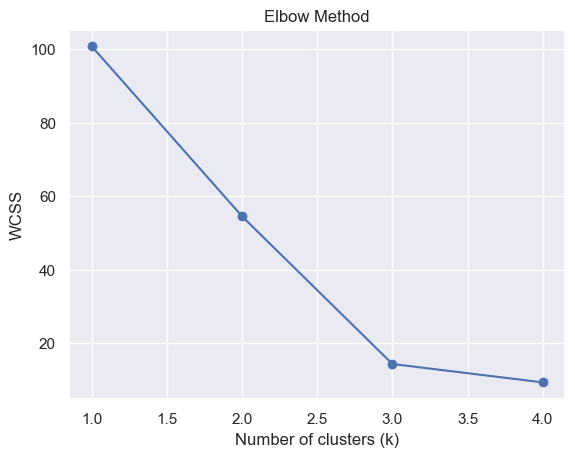

In [19]:
# plot the elbow graph
plt.plot(k_range, wcss, marker ='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [21]:
df = pd.read_csv('BMX_G.csv')
df.head()

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
1,2,62162,1,12.7,NaN,95.7,NaN,NaN,NaN,94.7,...,16.6,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN


In [23]:
print(df.shape)

(9338, 27)


In [25]:
# Check for missing values
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [27]:
# remove the missing values
df = df.dropna(subset = ['bmxleg','bmxwaist']) #remove rows with NaNs
print(df.shape)

(6899, 27)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6899 entries, 0 to 9337
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6899 non-null   int64  
 1   seqn        6899 non-null   int64  
 2   bmdstats    6899 non-null   int64  
 3   bmxwt       6889 non-null   float64
 4   bmiwt       24 non-null     float64
 5   bmxrecum    0 non-null      float64
 6   bmirecum    0 non-null      float64
 7   bmxhead     0 non-null      float64
 8   bmihead     0 non-null      float64
 9   bmxht       6891 non-null   float64
 10  bmiht       148 non-null    float64
 11  bmxbmi      6882 non-null   float64
 12  bmdbmic     1959 non-null   float64
 13  bmxleg      6899 non-null   float64
 14  bmileg      0 non-null      float64
 15  bmxarml     6893 non-null   float64
 16  bmiarml     0 non-null      float64
 17  bmxarmc     6895 non-null   float64
 18  bmiarmc     2 non-null      float64
 19  bmxwaist    6899 non-null   floa

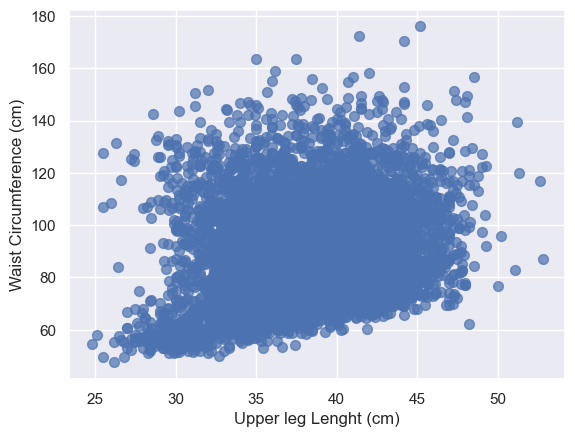

In [43]:
# Select the upper leg lenght and waist circumference. There is more than one way to do this.
points = df.iloc[:, [13, 19]].values
x = points[:, 0]
y = points[:, 1]

# plot a scatter plot showing the distribution in upper leg length and waist circumference
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Upper leg Lenght (cm)')
plt.ylabel('Waist Circumference (cm)')
plt.show()

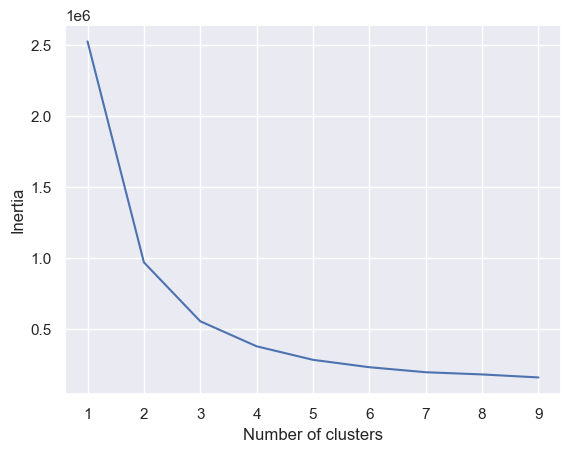

In [45]:
# Finding the Optimal Size of K using the Elbow Method
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [47]:
# Create three sizes of Bermuda shorts. In this case, you set K=3

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel('Upper leg Lenght (cm)')
plt.ylabel('Waist Circumference(cm)')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [49]:
# print the value of the three centroids
print(centers)

[[ 38.81652542 118.69166667]
 [ 37.12345024  72.52703915]
 [ 38.78023755  95.00250742]]


In [51]:
# experiment with different values of k=2,4,5
# does it make sense to set K=1?